In [235]:
# import sys
# !{sys.executable} -m pip install scipy
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy
import csv
from scipy import stats, optimize, interpolate
plt.rcParams.update({'font.size': 11})

In [236]:
def csv_FS(filepath):
    
    fsNoPor, tfsNoPor = 374330000.0, 4.97
    
    arr = np.loadtxt(str(filepath), delimiter=",", dtype=str)
    i=0
    stressxx = []
    for i in range(len(arr)-1):
        stressxx.append(float(arr[i+1][26]))
        i=i+1
    stressxx = np.array(stressxx)
    dt=0.01
    time = np.linspace(0,len(stressxx)*dt, len(stressxx))
    stressxx = stressxx[:-1]
    time = time[:-1]
    
    fs = np.amax(stressxx)
    tfs = np.where(stressxx == fs)[0][0]*dt
    
    relTime, relStressxx, relTfs, relFs = time/tfsNoPor, stressxx/fsNoPor, tfs/tfsNoPor, fs/fsNoPor
    
    print('filepath=',str(filepath),'fs=',fs, 'tfs=',tfs, 'relFs=',relFs, 'relTfs=',relTfs)
    
    # return time, stressxx, tfs, fs
    return relTime, relStressxx, relTfs, relFs

In [239]:
def process(arr):
    
    process_tests = arr
    for i in range(len(process_tests)):
        y = csv_FS('test/test3/fs/'+str(process_tests[i])+'.csv')
        fig, ax = plt.subplots(figsize = (3.5, 3), layout='constrained')
        
        if "1073" in str(process_tests[i]):
            plt.plot(y[0],y[1], label=str(process_tests[i]), color='brown')
            plt.scatter(y[2], y[3], color='brown')
        if "1273" in str(process_tests[i]):
            plt.plot(y[0],y[1], label=str(process_tests[i]), color='orange')
            plt.scatter(y[2], y[3], color='orange')
        if "1323" in str(process_tests[i]):
            plt.plot(y[0],y[1], label=str(process_tests[i]))
            plt.scatter(y[2], y[3])
        plt.ylim([-0.1,1.1])
        plt.yticks(np.arange(0,1.25,step=0.25))
        plt.xlim([-0.1,1.5])
        plt.xlabel('normalized time')
        plt.ylabel(r'normalized $\sigma_{xx}$')
        plt.grid(True)
        # plt.legend()    
        plt.savefig('/Users/jjmarzia/Downloads/fs'+str(process_tests[i])+'.svg', dpi=220,bbox_inches='tight')


filepath= test/test3/fs/107309.csv fs= 374320000.0 tfs= 4.98 relFs= 0.9999732856036118 relTfs= 1.0020120724346078
filepath= test/test3/fs/107330.csv fs= 374330000.0 tfs= 4.98 relFs= 1.0 relTfs= 1.0020120724346078
filepath= test/test3/fs/107360.csv fs= 374320000.0 tfs= 4.97 relFs= 0.9999732856036118 relTfs= 1.0
filepath= test/test3/fs/107395.csv fs= 374330000.0 tfs= 4.97 relFs= 1.0 relTfs= 1.0
filepath= test/test3/fs/127309.csv fs= 374320000.0 tfs= 4.98 relFs= 0.9999732856036118 relTfs= 1.0020120724346078
filepath= test/test3/fs/127330.csv fs= 374330000.0 tfs= 4.99 relFs= 1.0 relTfs= 1.0040241448692153
filepath= test/test3/fs/127360.csv fs= 368480000.0 tfs= 5.28 relFs= 0.9843720781128951 relTfs= 1.062374245472837
filepath= test/test3/fs/127395.csv fs= 344310000.0 tfs= 5.65 relFs= 0.9198033820425827 relTfs= 1.1368209255533201
filepath= test/test3/fs/132309.csv fs= 374320000.0 tfs= 4.99 relFs= 0.9999732856036118 relTfs= 1.0040241448692153
filepath= test/test3/fs/132330.csv fs= 341360000.0

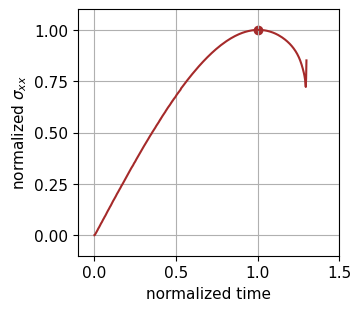

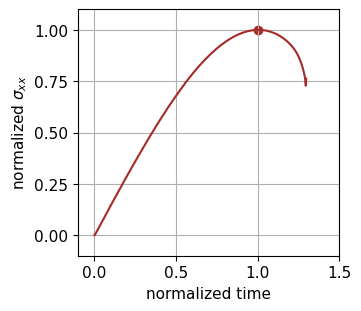

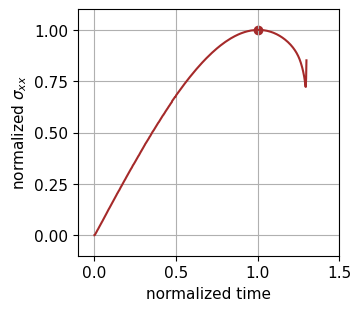

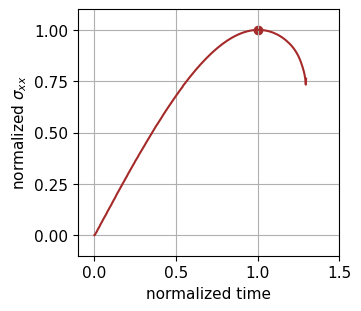

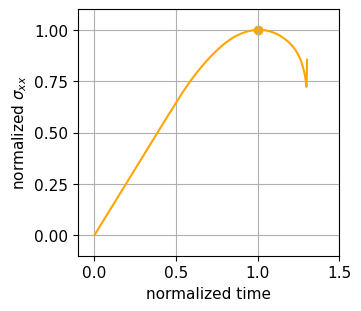

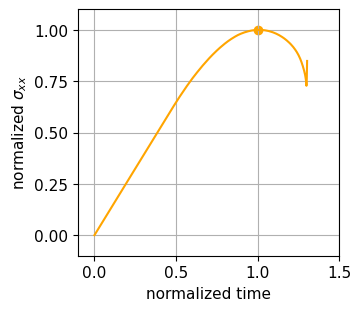

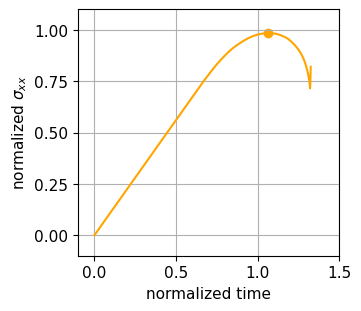

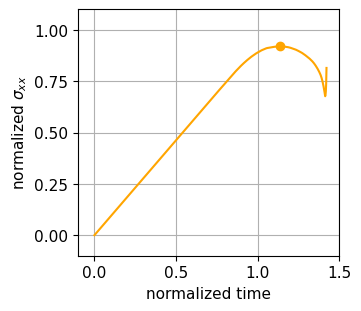

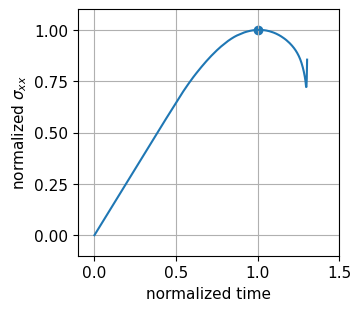

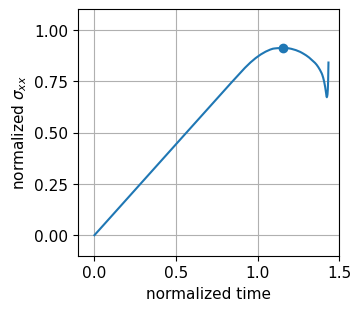

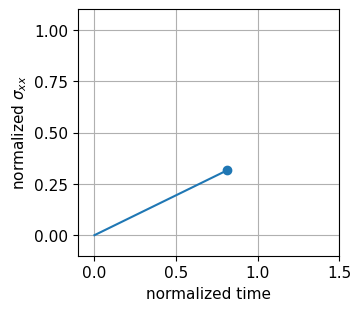

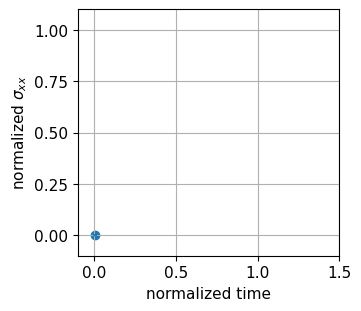

In [240]:
process(['107309',
         '107330',
         '107360',
         '107395',
    '127309',
                '127330',
                '127360',
                '127395',
                '132309',
                '132330',
                '132360',
                '132395'])


# y = csv_FS('test/test3/fs/127395.csv')


# print(len(y))
# for i in len(y):